# Transform CH4 and N2O emissions to CO2eq and plot

From: https://ghgprotocol.org/sites/default/files/Global-Warming-Potential-Values%20(Feb%2016%202016)_1.pdf

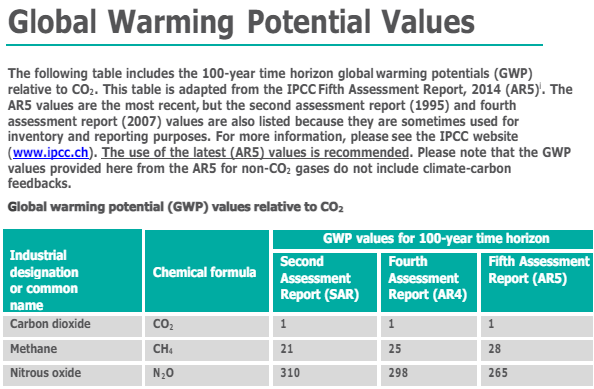

To convert CH4 and N2O emissions to CO2eq, we need to multiply the emissions for each gas Global Warming Potential (GWP) value.

**GWP CH4 = 28**

**GWP N2O = 265**

In [23]:
import pandas as pd
import numpy as np

In [24]:
emissions_df = pd.read_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_v1.parquet')

In [25]:
#Fill missing values with 0
emissions_df.fillna(0, inplace=True)

In [26]:
emissions_df.sample(5)

Area Code                         Area  Year  Item Code          Item  \
111741        137                    Mauritius  2013       1757        Cattle   
110201        136                   Mauritania  1982         79        Millet   
162579        203                        Spain  2007        116      Potatoes   
172448        215  United Republic of Tanzania  1976         15         Wheat   
201899       5000                        World  1982         56  Maize (corn)   

        Burning_crop_residues_(Emissions_CH4)_(kt)  \
111741                                      0.0000   
110201                                      0.0000   
162579                                      0.0000   
172448                                      0.0529   
201899                                    335.8549   

        Burning_crop_residues_(Emissions_N2O)_(kt)  \
111741                                      0.0000   
110201                                      0.0000   
162579                                      0.0000   
172448                                      0.0014   
201899                                      8.7073   

        Crop_residues_(Emissions_N2O)_(kt)  Crops_total_(Emissions_CH4)_(kt)  \
111741                              0.0000                            0.0000   
110201                              0.0005                            0.0000   
162579                              0.0832                            0.0000   
172448                              0.0181                            0.0529   
201899                             74.5032                          335.8549   

        Crops_total_(Emissions_N2O)_(kt)  ...  \
111741                            0.0000  ...   
110201                            0.0005  ...   
162579                            0.0832  ...   
172448                            0.0195  ...   
201899                           83.2106  ...   

        Synthetic_fertilizers_(Emissions_N2O)_(kt)  \
111741                                         0.0   
110201                                         0.0   
162579                                         0.0   
172448                                         0.0   
201899                                         0.0   

        Emissions_(N2O)_(Manure_applied)_(kt)  \
111741                                    0.0   
110201                                    0.0   
162579                                    0.0   
172448                                    0.0   
201899                                    0.0   

        Enteric_fermentation_(Emissions_CH4)_(kt)  \
111741                                     0.2919   
110201                                     0.0000   
162579                                     0.0000   
172448                                     0.0000   
201899                                     0.0000   

        Livestock_total_(Emissions_CH4)_(kt)  \
111741                                0.2992   
110201                                0.0000   
162579                                0.0000   
172448                                0.0000   
201899                                0.0000   

        Livestock_total_(Emissions_N2O)_(kt)  \
111741                                0.0136   
110201                                0.0000   
162579                                0.0000   
172448                                0.0000   
201899                                0.0000   

        Manure_left_on_pasture_(Emissions_N2O)_(kt)  \
111741                                       0.0129   
110201                                       0.0000   
162579                                       0.0000   
172448                                       0.0000   
201899                                       0.0000   

        Manure_management_(Emissions_CH4)_(kt)  \
111741                                  0.0072   
110201                                  0.0000   
162579                                  0.0000   
172448                                  0.0000 

## Function to transform emissions

In [27]:
def create_CO2eq_columns(df):
    # Define the conversion factors
    conversion_factors = {
        'N2O': 265,
        'CH4': 28
    }
    
    # Loop through the columns in the dataframe
    for column in df.columns:
        if 'N2O' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('N2O', 'N2O_CO2eq')
            # Multiply by the N2O conversion factor
            df[new_column] = df[column] * conversion_factors['N2O']
            df.drop(column, axis=1, inplace=True)
        
        elif 'Emissions_CH4' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('Emissions_CH4', 'Emissions_CH4_CO2eq')
            # Multiply by the CH4 conversion factor
            df[new_column] = df[column] * conversion_factors['CH4']
            df.drop(column, axis=1, inplace=True)
    
    return df

In [28]:
emissions_df2 = create_CO2eq_columns(emissions_df)

In [29]:
emissions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252987 entries, 0 to 252986
Data columns (total 21 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Area Code                                          252987 non-null  int64  
 1   Area                                               252987 non-null  object 
 2   Year                                               252987 non-null  int64  
 3   Item Code                                          252987 non-null  int64  
 4   Item                                               252987 non-null  object 
 5   Stocks_(An)                                        252987 non-null  float64
 6   crops_or_livestock                                 252987 non-null  object 
 7   Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)   252987 non-null  float64
 8   Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)   252987 non-null  float6

## Sum up all emissions to obtain PRODUCTION TOTAL EMISSIONS (CO2eq)

In [30]:
for column in emissions_df2.columns:
        if 'CO2eq' in column:
                print(column)

Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)
Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)
Crop_residues_(Emissions_N2O_CO2eq)_(kt)
Crops_total_(Emissions_CH4_CO2eq)_(kt)
Crops_total_(Emissions_N2O_CO2eq)_(kt)
Rice_cultivation_(Emissions_CH4_CO2eq)_(kt)
Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt)
Emissions_(N2O_CO2eq)_(Manure_applied)_(kt)
Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt)
Livestock_total_(Emissions_CH4_CO2eq)_(kt)
Livestock_total_(Emissions_N2O_CO2eq)_(kt)
Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt)
Manure_management_(Emissions_CH4_CO2eq)_(kt)
Manure_management_(Emissions_N2O_CO2eq)_(kt)


In [31]:
total_columns = [
    ["Crops_total_(Emissions_CH4_CO2eq)_(kt)", "Crops_total_(Emissions_N2O_CO2eq)_(kt)"],
    ["Livestock_total_(Emissions_CH4_CO2eq)_(kt)", "Livestock_total_(Emissions_N2O_CO2eq)_(kt)"],
]

# Create TOTAL TOTAL column
emissions_df2["production_TOTAL_(emissions_CO2eq)_(kt)"] = 0

# Loop over column emissions and sum
for column in total_columns:
    emissions_df2["production_TOTAL_(emissions_CO2eq)_(kt)"] += emissions_df2[column].sum(axis=1)

In [32]:
emissions_df2.head()

Area Code     Area  Year  Item Code          Item  Stocks_(An)  \
0          1  Armenia  1992         15         Wheat          0.0   
1          1  Armenia  1992         44        Barley          0.0   
2          1  Armenia  1992         56  Maize (corn)          0.0   
3          1  Armenia  1992         71           Rye          0.0   
4          1  Armenia  1992         75          Oats          0.0   

  crops_or_livestock  Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)  \
0              crops                                            1.9796   
1              crops                                            0.0000   
2              crops                                            0.0980   
3              crops                                            0.0000   
4              crops                                            0.0000   

   Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)  \
0                                            0.4770   
1                                            0.0000   
2                                            0.0265   
3                                            0.0000   
4                                            0.0000   

   Crop_residues_(Emissions_N2O_CO2eq)_(kt)  ...  \
0                                    9.7520  ...   
1                                   10.7590  ...   
2                                    0.1855  ...   
3                                    0.0795  ...   
4                                    0.1590  ...   

   Rice_cultivation_(Emissions_CH4_CO2eq)_(kt)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt)  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Emissions_(N2O_CO2eq)_(Manure_applied)_(kt)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Livestock_total_(Emissions_CH4_CO2eq)_(kt)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Livestock_total_(Emissions_N2O_CO2eq)_(kt)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Manure_management_(Emissions_CH4_CO2eq)_(kt)  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Manu

In [36]:
#save a sample
emissions_df.query('Area == "World"').to_csv(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_world.csv', index=False)

In [33]:
emissions_df.to_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_v2.parquet', index=False)